# Generate correction profiles for denoised

by Pu Zheng

2019.06.18

In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

print(os.getpid())

46944


In [2]:
reload(ia.get_img_info)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.alignment_tools)
reload(ia.correction_tools.illumination)

<module 'ImageAnalysis3.correction_tools.illumination' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\illumination.py'>

# Data folder

In [3]:
# master folder for this dataset:
master_folder = r'\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++'
# correction folder
correction_folder=os.path.join(master_folder, 'Corrections')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

# Illumination_correction

In [4]:
#master_folder = r'\\10.245.74.116\Chromatin_NAS_4\20191218_CTP05-chr21_HCT116_6hauxin'
#correction_folder =os.path.join(master_folder, 'Corrections')
folders, fovs = get_img_info.get_folders(master_folder, 'H')
folders = [_fd for _fd in folders if ('Cy' in _fd and '3color' not in _fd) or 'H0R0' in _fd]
print(folders)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 81
- Number of field of views: 72
['\\\\10.245.74.158\\Chromatin_NAS_6\\20201012-mouse_proB_IgH++\\H0R0', '\\\\10.245.74.158\\Chromatin_NAS_6\\20201012-mouse_proB_IgH++\\H74R24Cy7', '\\\\10.245.74.158\\Chromatin_NAS_6\\20201012-mouse_proB_IgH++\\H75R24Cy5']


In [5]:
# shared parameters
single_im_size = np.array([35,2048,2048])
all_colors = ['750','647','488','405']
# image and threads
num_images = 60
num_threads = 30

# Illumination correction

-- directly load:[] illumination profiles for files
-- start calculating ['750', '647', '488', '405'] illumination profiles
-- 60 among 72 dax files will be loaded in data_folder: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H0R0
++ start multi-processing illumination profile calculateion with 30 threads for 60 images in 1158.42s.
-- saving updated profiles
--- saving 750 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections\illumination_correction_750_2048x2048.npy
--- saving 647 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections\illumination_correction_647_2048x2048.npy
--- saving 488 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections\illumination_correction_488_2048x2048.npy
--- saving 405 profile into file: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections\illumination_correction_405_2048x2048.npy


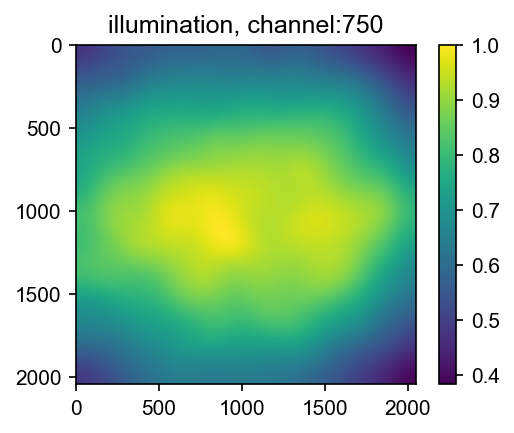

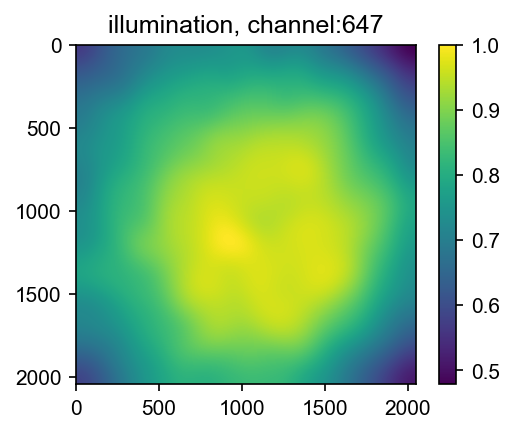

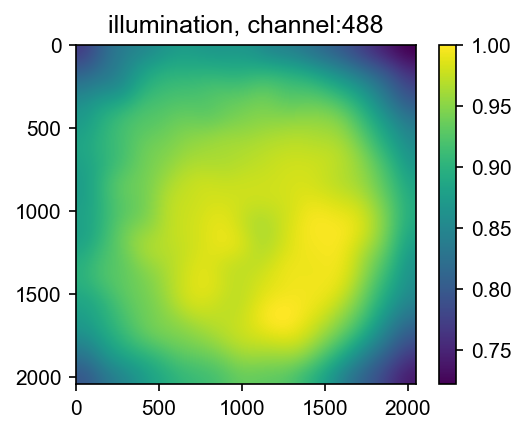

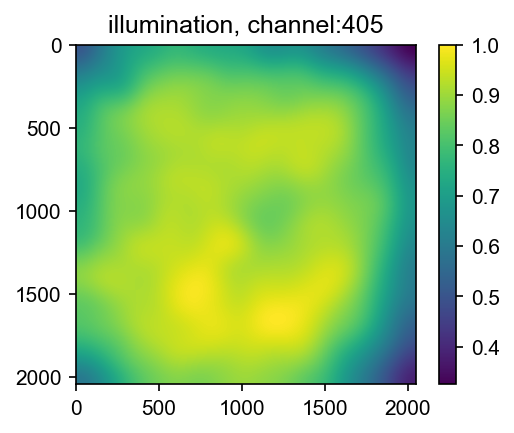

-- finish generating illumination profiles, time:1190.65s


In [9]:
%matplotlib inline
reload(ia.correction_tools.illumination)

dapi_folder = folders[0]
illumination_pfs = correction_tools.illumination.Generate_Illumination_Correction(
                        dapi_folder, 
                        all_colors,
                        all_channels=all_colors,
                        num_threads=num_threads,
                        num_images=num_images,
                        single_im_size=single_im_size,
                        correction_folder=correction_folder,
                        gaussian_filter_size=60,
                        save=True, save_folder=correction_folder,
                        overwrite=False,
                        )

# Chromatic Abbrevation

## chromatic for 750

In [16]:
cc_folder = folders[1]
ref_folder = folders[2]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H74R24Cy7 \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5


++ generating chromatic info for 40 images in 20 threads in 2267.764s.
++ fitting polynomial orders: [1 1 1]
-- constants: [ 2.18325971e-01  1.47750723e-02 -9.58693868e-07  3.15479204e-05] with rsquare=0.3599429684786537
-- constants: [-2.48105252e-02  2.01826717e-03 -1.82465972e-03  1.36473686e-05] with rsquare=0.9761135277372379
-- constants: [-1.23677537e-01 -5.45136142e-04 -5.45356247e-06 -1.82303478e-03] with rsquare=0.9739049814258113
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections


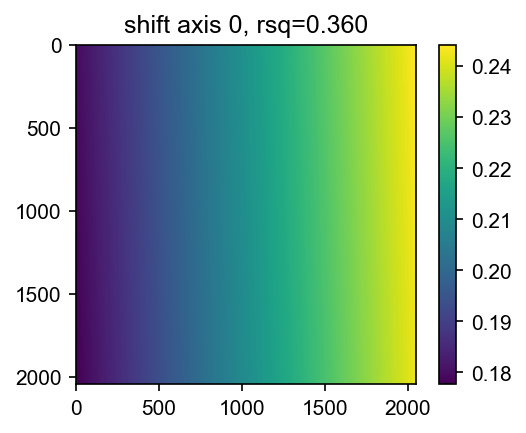

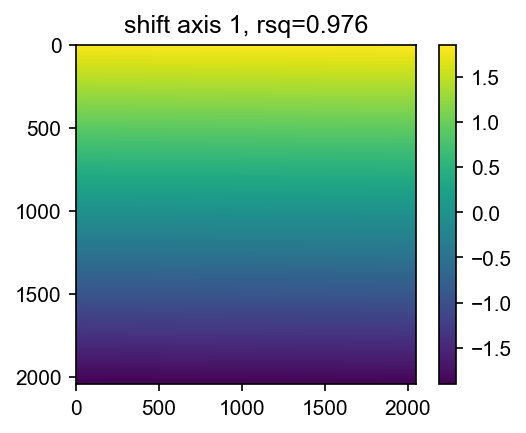

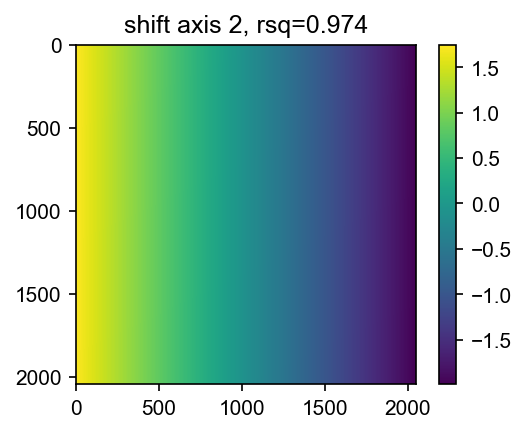

In [13]:
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '750',
                                    num_images=num_images, 
                                    num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_profile=True)

### check chromatic abbrevation, 750-647

In [22]:
# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [750], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [750], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H75R24Cy5\Conv_zscan_05.dax  in 3.007s
-- removing hot pixels for channels:['647', '488'] in 35.413s
-- illumination correction for channels: 647, 488, in 6.867s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 47.063s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H74R24Cy7\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_35_2048_2048_const.pkl
	 647 None
-- 

<IPython.core.display.Javascript object>


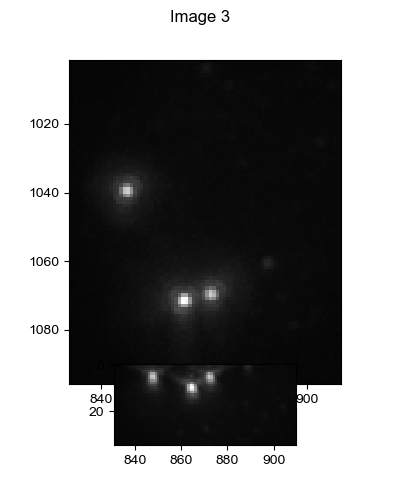

In [23]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [28]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function(_coords, _drift=array([ 0.  , -0.79,  0.29]), _consts=[array([ 2.18325971e-01,  1.47750723e-02, -9.58693868e-07,  3.15479204e-05]), array([-2.48105252e-02,  2.01826717e-03, -1.82465972e-03,  1.36473686e-05]), array([-1.23677537e-01, -5.45136142e-04, -5.45356247e-06, -1.82303478e-03])], _fitting_orders=array([1, 1, 1]), _ref_center=array([  17.5, 1024. , 1024. ]))>

In [34]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '750', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '750', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:750, 500 seeded, normalize total background:285.00, 500 fitted in 61.562s.
-- start fitting spots in channel:750, 500 seeded, normalize total background:285.00, 500 fitted in 62.365s.
-- start fitting spots in channel:647, 500 seeded, normalize total background:585.00, 500 fitted in 61.056s.


<IPython.core.display.Javascript object>


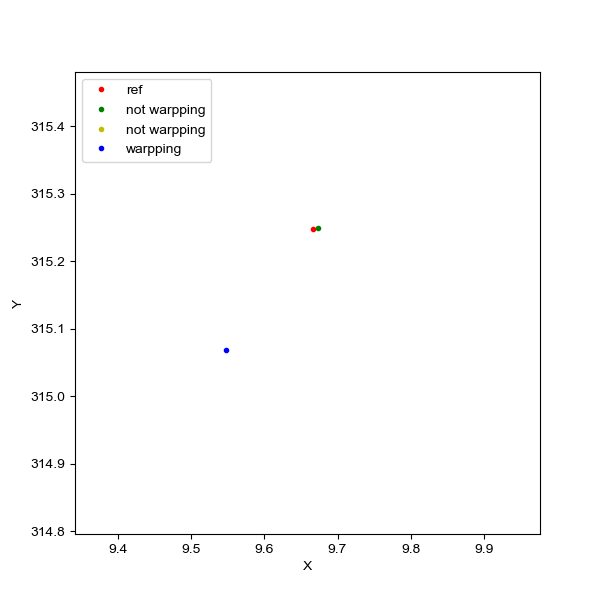

In [84]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not warpping')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

In [85]:
from ImageAnalysis3.spot_tools.matching import find_paired_centers, check_paired_centers

# matching
_new_drift, paired_ref_cts, paired_corr_cts = find_paired_centers(ref_spots[:,1:4], corr_spots[:,1:4], drift=drift)
print(_new_drift)
_new_drift, paired_ref_cts, paired_corr_cts = check_paired_centers(paired_ref_cts, paired_corr_cts+drift)
print(_new_drift)

[-0.01766196 -0.09067997 -0.01237969]
[-0.01694834  0.69215355 -0.30152252]


## visualize

<IPython.core.display.Javascript object>


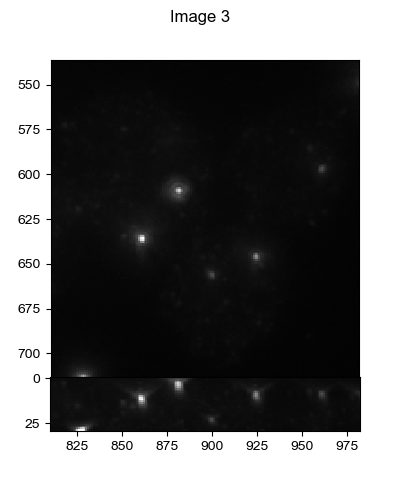

In [16]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

# bleedthrough correction

In [6]:
from ImageAnalysis3 import _image_size, _correction_folder, _allowed_colors
reload(correction_tools.bleedthrough)
from ImageAnalysis3.correction_tools.bleedthrough import find_bleedthrough_pairs, interploate_bleedthrough_correction_from_channel
import multiprocessing as mp
from ImageAnalysis3.correction_tools.chromatic import generate_polynomial_data


bleedthrough_channels=['750', '647']

bleedthrough_correction_args = {
    'correction_folder': _correction_folder,
    'single_im_size':single_im_size,
    'all_channels':all_colors,
    'corr_channels':['750','647'],
    'bleed_corr':False,
    'illumination_corr':False,
    'chromatic_corr':False,
}

bleedthrough_fitting_args = {'max_num_seeds':1000,
    'th_seed': 500,
    'use_dynamic_th':True,
}
reload(correction_tools.bleedthrough)

<module 'ImageAnalysis3.correction_tools.bleedthrough' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\bleedthrough.py'>

+ generating bleedthrough profiles.
++ generating bleedthrough info for 60 images in 30 threads in 3.326s.
- check 2956 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
[ True  True  True ...  True  True False] [ True  True  True ...  True  True False]
-- iter: 1, kept in this round: 0.854, total: 0.854


E:\Users\puzheng\Documents\ImageAnalysis3\correction_tools\bleedthrough.py:174: RuntimeWarning: divide by zero encountered in true_divide
  _nb_weights = 1 / np.linalg.norm(_nb_coords-_coord, axis=1)
E:\Users\puzheng\Documents\ImageAnalysis3\correction_tools\bleedthrough.py:175: RuntimeWarning: invalid value encountered in true_divide
  _nb_weights = _nb_weights / np.sum(_nb_weights)


[ True  True  True ...  True  True  True] [ True  True  True ...  True  True False]
-- iter: 2, kept in this round: 0.895, total: 0.764
[ True  True  True ...  True  True  True] [ True  True  True ...  True  True False]
-- iter: 3, kept in this round: 0.916, total: 0.700
[ True  True  True ...  True  True  True] [ True  True  True ...  True  True False]
-- iter: 4, kept in this round: 0.946, total: 0.662
[ True  True  True ...  True  True  True] [ True  True  True ...  True  True False]
-- iter: 5, kept in this round: 0.956, total: 0.633
- 1871 pairs passed.
-- 1871 spots are used to generate profiles from 750 to 647
[ 1.58546819e-01 -5.10835927e-04 -4.79565386e-06  8.46425795e-06
 -9.54962000e-06  6.74036728e-08  9.11747814e-08  1.70720684e-09
  1.06922139e-09 -5.36053613e-09] 0.05895837673107007
[ 3.55538071e+02 -7.84063700e-01  1.77818368e-01  1.91032853e-01
  1.52604780e-02  1.89033778e-04 -1.31977901e-04 -8.16362726e-05
 -5.95328654e-07 -8.07527808e-05] 0.5760511814945967
-- savin

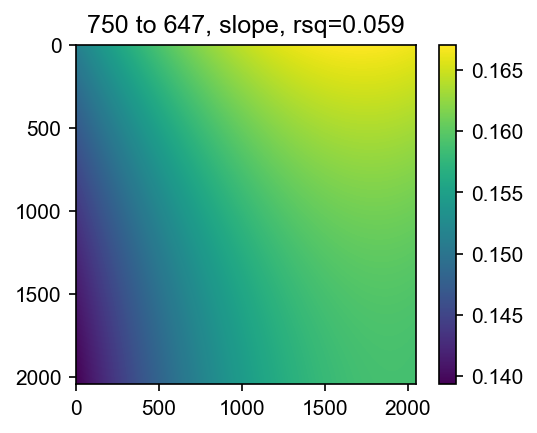

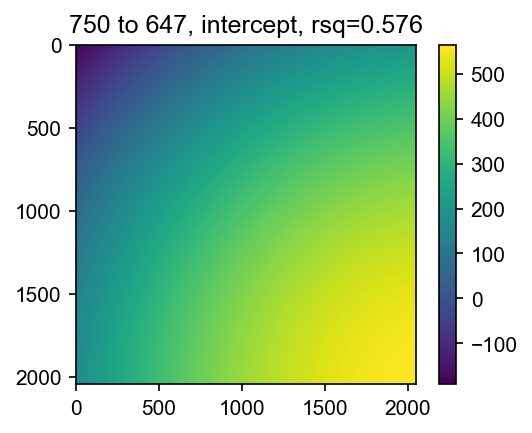

-- not enough spots (32) from 647 to 750
-- saving to file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Corrections\bleedthrough_correction_750_647_2048_2048.npy


In [21]:
%matplotlib inline
reload(correction_tools.bleedthrough)
bleed_pf = correction_tools.bleedthrough.Generate_bleedthrough_correction(
            folders[1:3],
            rsq_th=0.81,
            corr_channels=bleedthrough_channels,
            correction_args=bleedthrough_correction_args,
            fitting_args=bleedthrough_fitting_args,
            num_images=num_images, 
            #num_images=30,
            num_threads=num_threads,
            save_folder=correction_folder,
            overwrite_profile=True,
            overwrite_temp=False,
            )

### Check bleedthorugh for cy7

In [22]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

In [23]:
reload(ia.io_tools.load)
cy7_filename = os.path.join(folders[0], fovs[3])

cy7_raw_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy7_corr_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H0R0\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H0R0\Conv_zscan_03.dax  in 5.591s
-- removing hot pixels for channels:['750', '647'] in 23.486s
-- illumination correction for channels: 750, 647, in 4.526s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 35.552s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H0R0\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_2048_2048.npy
-- loading image from file:\\10.245.74.158\Chroma

<IPython.core.display.Javascript object>


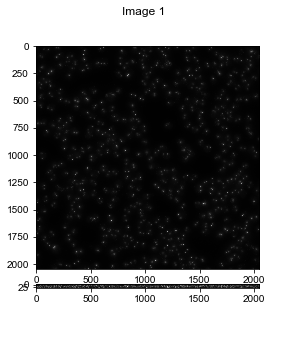

<IPython.core.display.Javascript object>


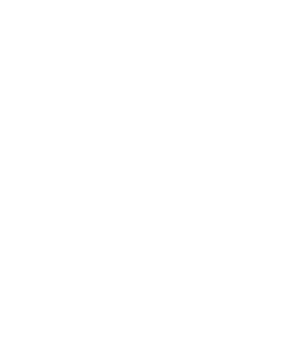

In [25]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy7_raw_ims[0], cy7_corr_ims[0], cy7_raw_ims[1], cy7_corr_ims[1]])

## Check bleedthrough for cy5

In [97]:
reload(ia.io_tools.load)
cy5_filename = os.path.join(folders[1], fovs[3])

cy5_raw_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy5_corr_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\169.254.229.228\Chromatin_NAS_3\20191007_CTP07_chr2\H4R4_Cy5\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\169.254.229.228\Chromatin_NAS_3\20191007_CTP07_chr2\H4R4_Cy5\Conv_zscan_02.dax  in 3.602s
-- removing hot pixels for channels:['750', '647', '561'] in 35.113s
-- illumination correction for channels: 750, 647, 561, in 7.695s
- correct the whole fov for image: \\169.254.229.228\Chromatin_NAS_3\20191007_CTP07_chr2\H4R4_Cy5\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048x2048.npy
-- loading imag

<IPython.core.display.Javascript object>


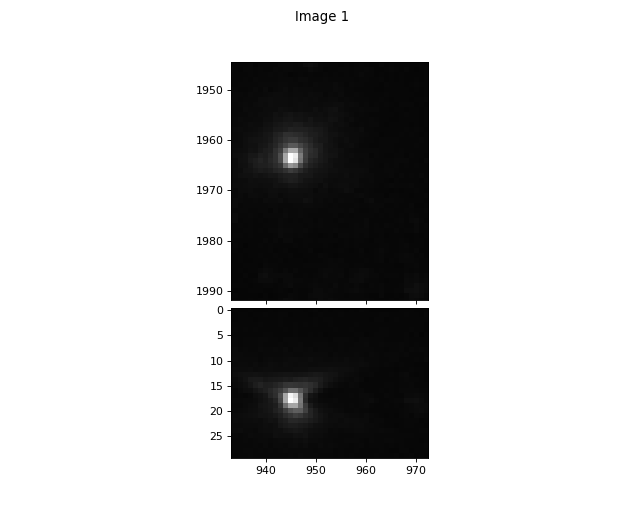

In [99]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy5_raw_ims[0], cy5_raw_ims[1], cy5_corr_ims[1], cy5_corr_ims[0]])